# 2017 Boston Marathon Finishers Analysis 


For this analysis, I have taken the Boston marathon 2017 dataset from Kaggle. It contains the name, age, gender, country, city, and state (where available), times at 9 different stages of the race, expected time, finish time and pace, overall place, gender place, and division place.
objective:

1. Check the distribution of participants from different countries, states, and cities?
2. How is the age distribution for the different age groups in both men Male and Female Category?
3. What are the most popular first and last names of the people who participated?
4. Find people who finished the second half of the marathon earlier than the first half?
5. Check if there is any person who has a similar time for the first and the second half of the marathon?
6. What are the time records for every 5km? starting from 0k to 40k?
7. Check for the division winners?

In [ ]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
sns.set_style("whitegrid")
%matplotlib inline 

from datetime import datetime 
import time

In [93]:
import os 
os.getcwd()

'/Users/avinashtripathi/Downloads'

In [94]:
os.chdir("/Users/avinashtripathi/Downloads")

In [95]:
df = pd.read_csv("marathon_results_2017.csv", index_col='Bib')

In [96]:
df.head()

,Unnamed: 0,Name,Age,M/F,City,State,Country,Citizen,Unnamed: 9,5K,...,25K,30K,35K,40K,Pace,Proj Time,Official Time,Overall,Gender,Division
Bib,,,,,,,,,,,,,,,,,,,,,
11,0,"Kirui, Geoffrey",24,M,Keringet,NaN,KEN,NaN,NaN,0:15:25,...,1:16:59,1:33:01,1:48:19,2:02:53,0:04:57,-,2:09:37,1,1,1
17,1,"Rupp, Galen",30,M,Portland,OR,USA,NaN,NaN,0:15:24,...,1:16:59,1:33:01,1:48:19,2:03:14,0:04:58,-,2:09:58,2,2,2
23,2,"Osako, Suguru",25,M,Machida-City,NaN,JPN,NaN,NaN,0:15:25,...,1:17:00,1:33:01,1:48:31,2:03:38,0:04:59,-,2:10:28,3,3,3
21,3,"Biwott, Shadrack",32,M,Mammoth Lakes,CA,USA,NaN,NaN,0:15:25,...,1:17:00,1:33:01,1:48:58,2:04:35,0:05:03,-,2:12:08,4,4,4
9,4,"Chebet, Wilson",31,M,Marakwet,NaN,KEN,NaN,NaN,0:15:25,...,1:16:59,1:33:01,1:48:41,2:05:00,0:05:04,-,2:12:35,5,5,5


Make all times, time deltas 

In [97]:
df.iloc[:,9:21] = df.iloc[:,9:21].apply(pd.to_timedelta)

In [131]:
df.head()

,Unnamed: 0,Age,M/F,City,State,Country,Citizen,Unnamed: 9,5K,10K,...,Pace,Proj Time,Official Time,Overall,Gender,Division,First Name,Last Name,Half_2,2nd_Split
Bib,,,,,,,,,,,,,,,,,,,,,
11,0,24,M,Keringet,NaN,KEN,NaN,NaN,00:15:25,00:30:28,...,00:04:57,0 days,02:09:37,1,1,1,Geoffrey,Kirui,01:05:02,0.450000
17,1,30,M,Portland,OR,USA,NaN,NaN,00:15:24,00:30:27,...,00:04:58,0 days,02:09:58,2,2,2,Galen,Rupp,01:05:23,0.800000
23,2,25,M,Machida-City,NaN,JPN,NaN,NaN,00:15:25,00:30:29,...,00:04:59,0 days,02:10:28,3,3,3,Suguru,Osako,01:05:52,1.266667
21,3,32,M,Mammoth Lakes,CA,USA,NaN,NaN,00:15:25,00:30:29,...,00:05:03,0 days,02:12:08,4,4,4,Shadrack,Biwott,01:07:23,2.633333
9,4,31,M,Marakwet,NaN,KEN,NaN,NaN,00:15:25,00:30:28,...,00:05:04,0 days,02:12:35,5,5,5,Wilson,Chebet,01:08:00,3.416667


In [99]:
df.describe()

,Unnamed: 0,Age,5K,10K,15K,20K,Half,25K,30K,35K,40K,Pace,Proj Time,Official Time,Overall,Gender,Division
count,26410.000000,26410.000000,26410,26410,26410,26410,26410,26410,26410,26410,26410,26410,26410,26410,26410.000000,26410.000000,26410.000000
mean,13204.500000,42.587732,0 days 00:25:31.962968,0 days 00:51:07.235138,0 days 01:17:21.580461,0 days 01:44:30.899280,0 days 01:50:25.843468,0 days 02:12:34.802044,0 days 02:42:21.125255,0 days 03:13:32.695910,0 days 03:44:40.938129,0 days 00:09:05.277167,0 days 00:00:00,0 days 03:58:03.555357,13206.260091,6660.973230,1588.796706
std,7624.054641,11.419467,0 days 00:04:03.447330,0 days 00:08:20.991642,0 days 00:12:30.331864,0 days 00:17:37.973902,0 days 00:18:28.396339,0 days 00:23:13.574798,0 days 00:28:52.314309,0 days 00:34:54.248563,0 days 00:40:05.537900,0 days 00:01:36.454296,0 days 00:00:00,0 days 00:42:08.883183,7624.370496,3910.031525,1423.199500
min,0.000000,18.000000,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:04:57,0 days 00:00:00,0 days 02:09:37,1.000000,1.000000,1.000000
25%,6602.250000,34.000000,0 days 00:22:41,0 days 00:45:26,0 days 01:08:40,0 days 01:32:31,0 days 01:37:42,0 days 01:56:50,0 days 02:22:24,0 days 02:49:15,0 days 03:16:34,0 days 00:07:57,0 days 00:00:00,0 days 03:28:19,6604.250000,3302.250000,502.000000
50%,13204.500000,43.000000,0 days 00:25:04,0 days 00:50:11,0 days 01:15:45,0 days 01:42:05,0 days 01:47:47,0 days 02:09:06,0 days 02:38:04,0 days 03:08:25,0 days 03:38:39,0 days 00:08:51,0 days 00:00:00,0 days 03:51:39.500000,13206.500000,6603.500000,1154.000000
75%,19806.750000,51.000000,0 days 00:27:45,0 days 00:55:33,0 days 01:23:57,0 days 01:53:32,0 days 01:59:53.750000,0 days 02:24:37,0 days 02:57:48,0 days 03:32:32.750000,0 days 04:06:59,0 days 00:10:00,0 days 00:00:00,0 days 04:21:48,19808.750000,9904.750000,2190.750000
max,26409.000000,84.000000,0 days 00:54:14,0 days 01:45:22,0 days 02:32:36,0 days 03:23:25,0 days 03:36:24,0 days 04:27:14,0 days 05:37:13,0 days 06:39:07,0 days 07:41:23,0 days 00:18:15,0 days 00:00:00,0 days 07:58:14,26411.000000,14438.000000,5846.000000


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26410 entries, 11 to 25266
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype          
---  ------         --------------  -----          
 0   Unnamed: 0     26410 non-null  int64          
 1   Name           26410 non-null  object         
 2   Age            26410 non-null  int64          
 3   M/F            26410 non-null  object         
 4   City           26410 non-null  object         
 5   State          22815 non-null  object         
 6   Country        26410 non-null  object         
 7   Citizen        1254 non-null   object         
 8   Unnamed: 9     91 non-null     object         
 9   5K             26410 non-null  timedelta64[ns]
 10  10K            26410 non-null  timedelta64[ns]
 11  15K            26410 non-null  timedelta64[ns]
 12  20K            26410 non-null  timedelta64[ns]
 13  Half           26410 non-null  timedelta64[ns]
 14  25K            26410 non-null  timedelta64[ns]
 15  30K   

# let's see finishers by age 

Text(0.5, 1.0, 'Number of participants per age group')

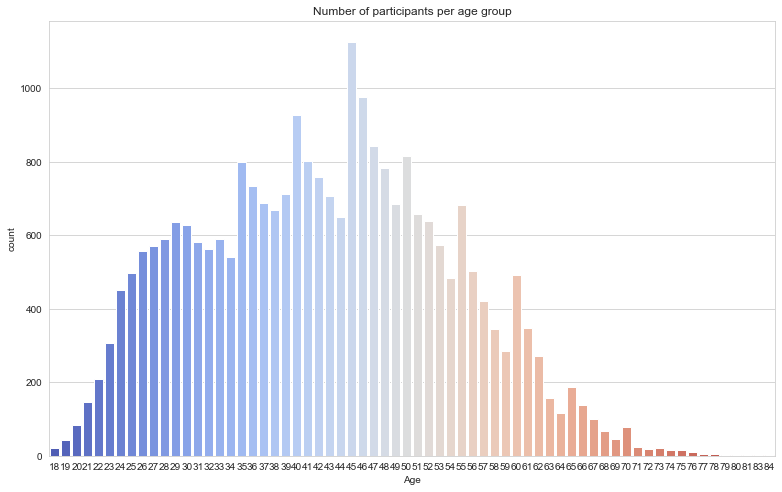

In [101]:
g = sns.countplot('Age', data= df, palette='coolwarm')
g.figure.set_size_inches(13,8)
g.set_title("Number of participants per age group" )

# let's see finshers by age and gender

Text(0.5, 1.0, 'count of people based on different genders and age')

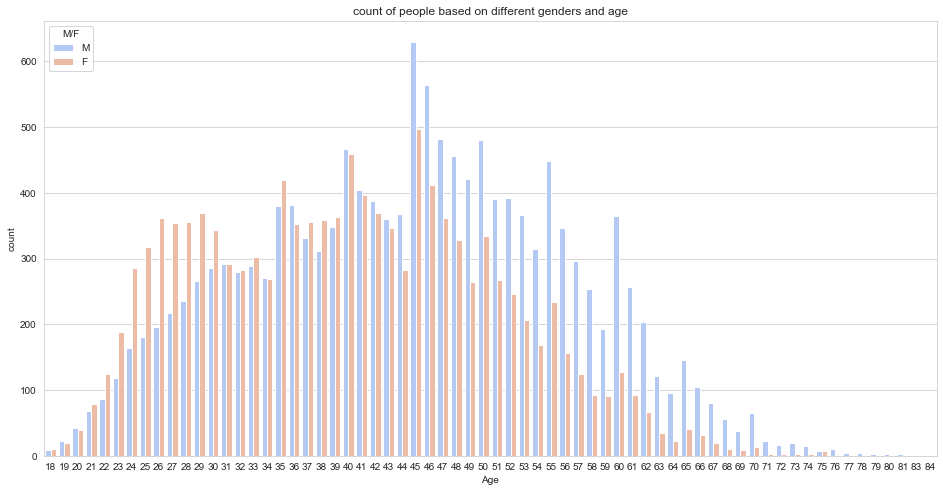

In [102]:
g = sns.countplot('Age', data=df, palette = "coolwarm", hue='M/F')
g.figure.set_size_inches(16,8)
g.set_title("count of people based on different genders and age")

In [103]:
#Box plot by age and gender 

Text(0.5, 1.0, 'distibution of finish time per age group')

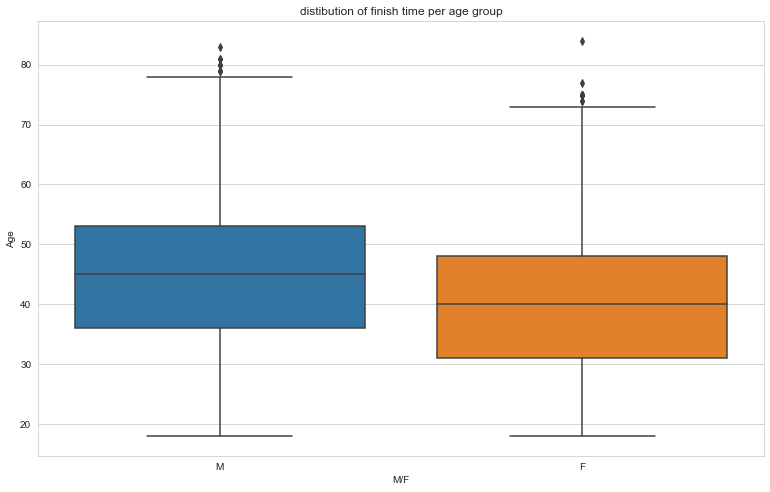

In [104]:
g = sns.boxplot("M/F", "Age", data=df)
g.figure.set_size_inches(13,8)
g.set_title("distibution of finish time per age group")

/Users/avinashtripathi/opt/anaconda3/lib/python3.7/site-packages/seaborn/regression.py:574: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


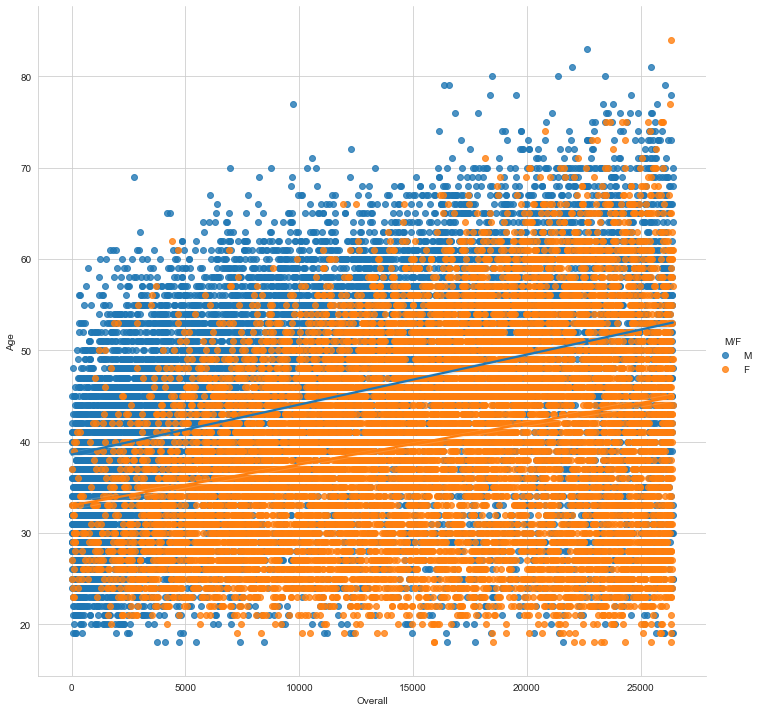

In [105]:
g = sns.lmplot(x='Overall', y='Age', data=df, hue='M/F', size=10)

# seperate the first and the last name 

In [106]:
s = df['Name'].apply(lambda x: x.split(', '))
df['First Name'] = s.apply(lambda x: x[1])
df['Last Name'] = s.apply(lambda x: x[0])
df.drop('Name', axis=1, inplace=True)

# Most popular country - finsihers (top 20)

Text(0.5, 1.0, 'Most popular Country')

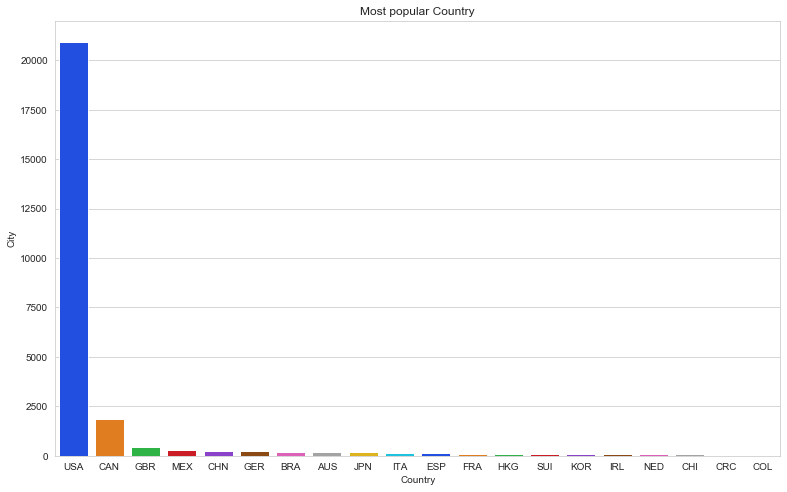

In [107]:
s = df.groupby('Country').count()['City'].sort_values(ascending=False).head(20)
g = sns.barplot(s.index, s, palette="bright")
g.figure.set_size_inches(13,8)
g.set_title("Most popular Country")

since US and canada looks much greater than other countries, hence we drop them and analyse the rest of the countries

Text(0.5, 1.0, 'Most popular Country (after US)')

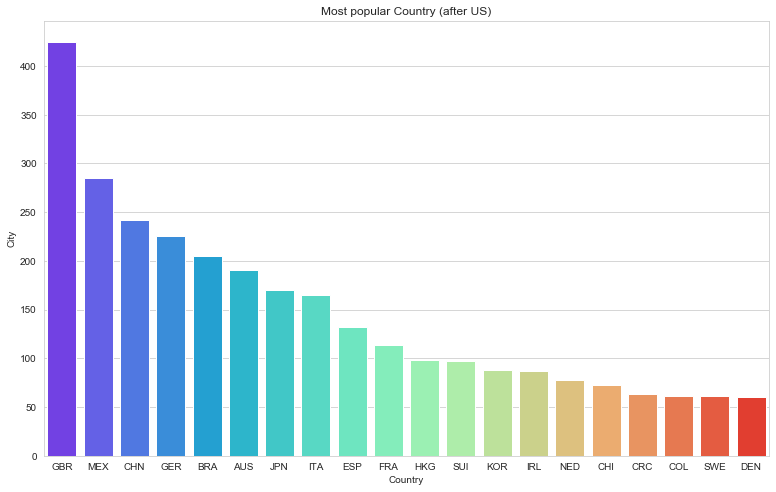

In [108]:
s = df.groupby('Country').count()['City'].sort_values(ascending=False).head(22)[2:]
g = sns.barplot(s.index, s, palette='rainbow')
g.figure.set_size_inches(13,8)
g.set_title("Most popular Country (after US)")

# Most popular city (top 20)

Text(0.5, 1.0, 'Most popular City')

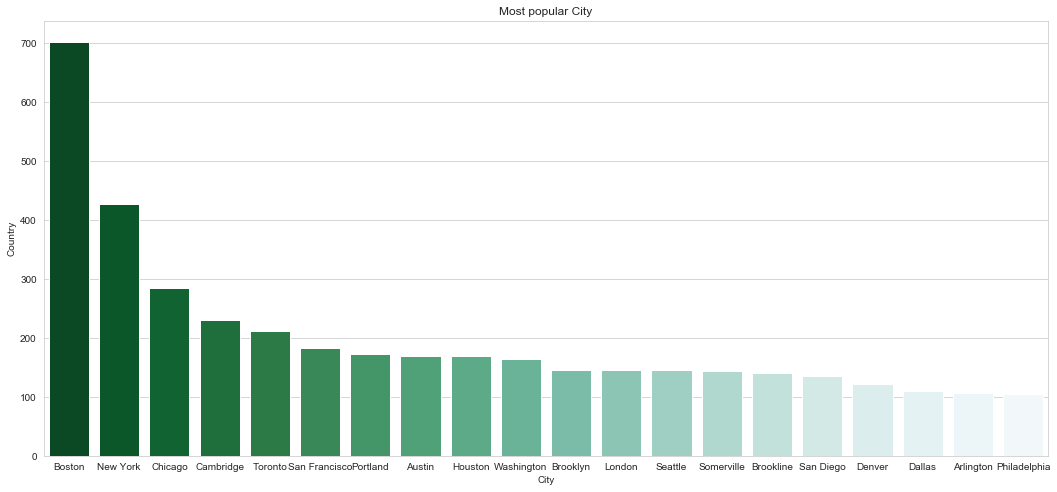

In [109]:
s = df[df['City'].notnull()].groupby('City').count()['Country'].sort_values(ascending=False).head(20)
g = sns.barplot(s.index, s, palette='BuGn_r')
g.figure.set_size_inches(18,8)
g.set_title("Most popular City")

# Most popular state (top 20)

Text(0.5, 1.0, 'Most popular State')

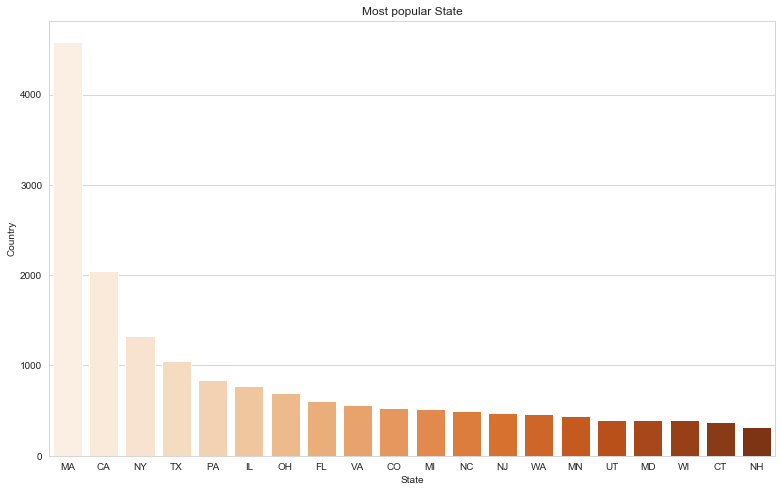

In [110]:
s = df[df['Country'] == 'USA'].groupby('State').count()['Country'].sort_values(ascending=False).head(20)
g = sns.barplot(s.index, s, palette="Oranges")
g.figure.set_size_inches(13,8)
g.set_title("Most popular State")

Text(0.5, 1.0, 'Most popular Name')

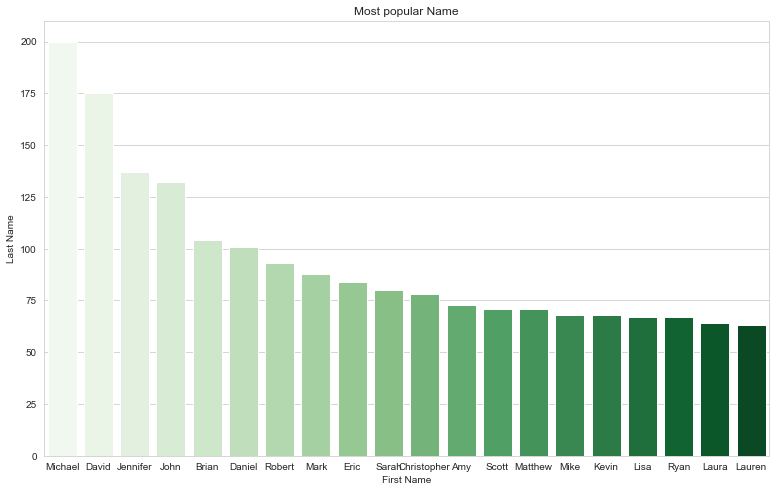

In [111]:
s = df.groupby('First Name').count()['Last Name'].sort_values(ascending=False).head(20)
g = sns.barplot(s.index, s, palette='Greens')
g.figure.set_size_inches(13,8)
g.set_title("Most popular Name")

Text(0.5, 1.0, 'Most popular Last Name')

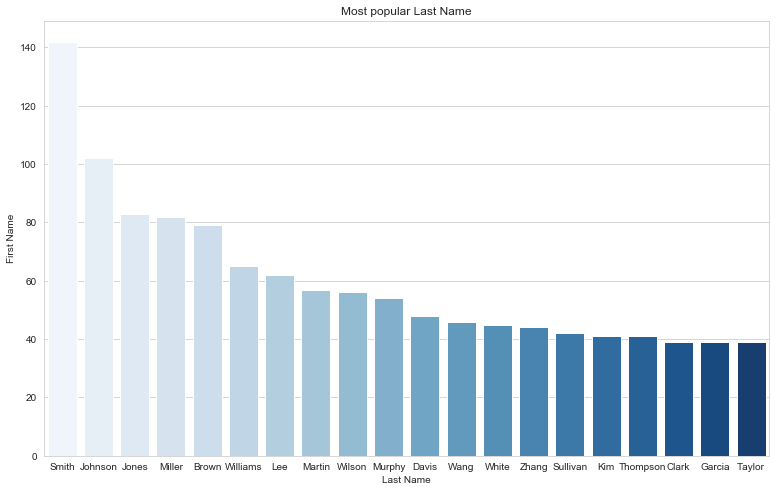

In [112]:
s = df.groupby('Last Name').count()['First Name'].sort_values(ascending=False).head(20)
g = sns.barplot(s.index, s, palette='Blues')
g.figure.set_size_inches(13,8)
g.set_title("Most popular Last Name")

# Distribution of official times by age
Official Time is transformed into a float to chart times.

/Users/avinashtripathi/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2272: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


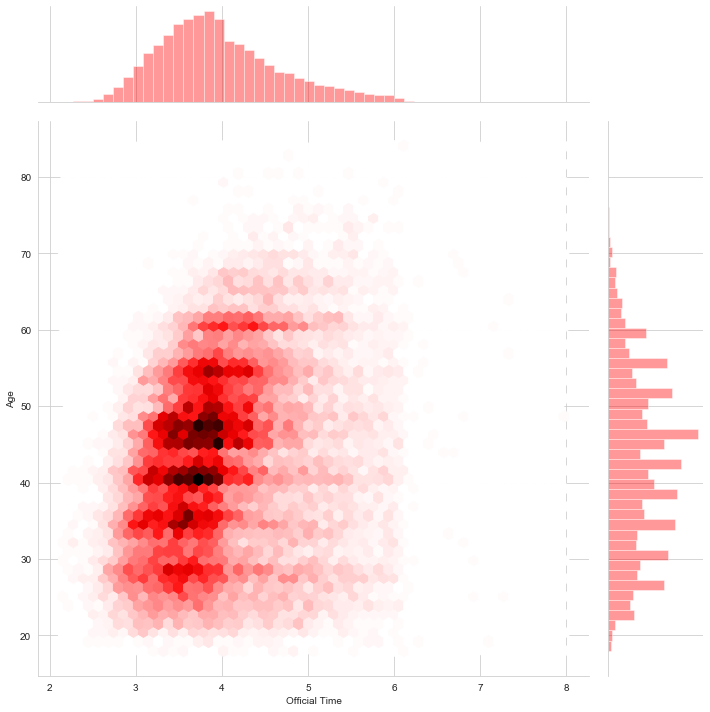

In [129]:
g = sns.jointplot( x=df['Official Time'].apply(lambda x: x.total_seconds()/3600), y=df['Age'], stat_func=None, kind='hex', color="r", size=10)

# Boxplot of finishing times by age

Text(0.5, 1.0, 'Distribution of finish times per Age group')

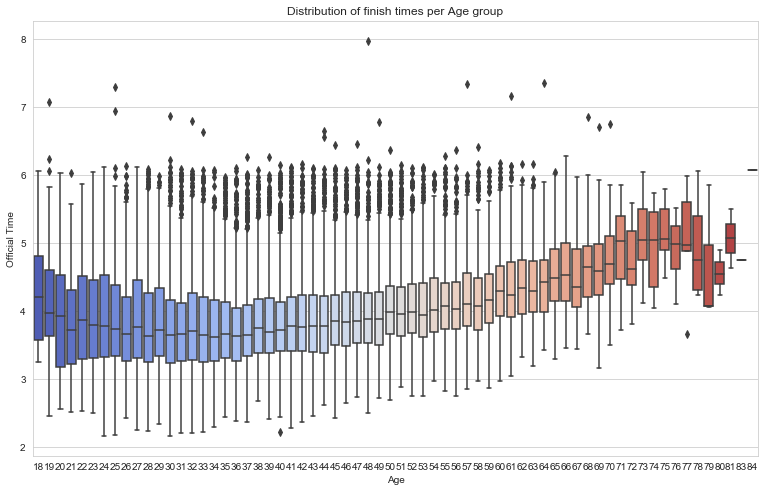

In [128]:
g = sns.boxplot(df['Age'], df['Official Time'].apply(lambda x: x.total_seconds()/3600), palette="coolwarm")
g.figure.set_size_inches(13,8)
g.set_title("Distribution of finish times per Age group")

# Analysis of first half vs second half 

In [113]:
df["Half_2"] = df['Official Time'] - df['Half']

calculate the difference between first half and second half

In [114]:
df['2nd_Split'] = (df['Half_2']-df["Half"])

In [115]:
df['2nd_Split']= df['2nd_Split'].apply(lambda x: x.total_seconds()/60)

/Users/avinashtripathi/opt/anaconda3/lib/python3.7/site-packages/seaborn/regression.py:574: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


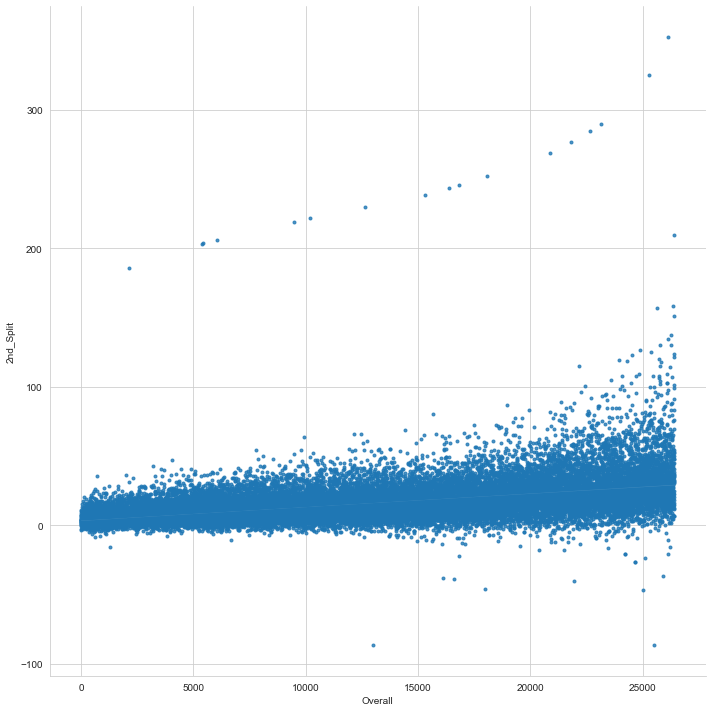

In [116]:
sns.lmplot(data=df, y='2nd_Split', x='Overall', size=10, markers='.')

The distinct line of points over 150 and up is caused by the records that don't have a 
half marathon registered (except for the very last that is over 250).

find the extreme cases of positive and negative split 

In [117]:
print(df[df['2nd_Split'] == df['2nd_Split'].max()][['5K', '10K','15K', '20K', '25K', '30K', '35K', '40K']])
print(df[df['2nd_Split'] == df['2nd_Split'].max()])

          5K    10K    15K    20K    25K      30K      35K      40K
Bib                                                                
31336 0 days 0 days 0 days 0 days 0 days 03:53:44 04:41:49 05:31:39
       Unnamed: 0  Age M/F           City State Country Citizen Unnamed: 9  \
Bib                                                                          
31336       26121   54   F  Chestnut Hill    MA     USA     NaN        NaN   

          5K    10K  ...     Pace Proj Time Official Time Overall Gender  \
Bib                  ...                                                   
31336 0 days 0 days  ... 00:13:28    0 days      05:52:47   26123  11809   

      Division First Name Last Name   Half_2   2nd_Split  
Bib                                                       
31336     1207     Sheila   Kennedy 05:52:47  352.783333  

[1 rows x 27 columns]


In [118]:
print(df[df['2nd_Split'] == df['2nd_Split'].min()][['5K', '10K', '15K', '20K', '25K', '30K', '35K', '40K', 'Division']])
print(df[df['2nd_Split'] == df['2nd_Split'].min()])

            5K      10K      15K      20K      25K      30K      35K      40K  \
Bib                                                                             
21281 00:25:40 00:51:55 01:21:42 03:23:25 03:50:05 04:17:47 04:46:34 05:18:34   

       Division  
Bib              
21281      4668  
       Unnamed: 0  Age M/F        City State Country Citizen Unnamed: 9  \
Bib                                                                       
21281       25510   28   M  Somerville    MA     USA     NaN        NaN   

            5K      10K  ...     Pace Proj Time Official Time Overall Gender  \
Bib                      ...                                                   
21281 00:25:40 00:51:55  ... 00:12:38    0 days      05:30:53   25512  14063   

      Division First Name  Last Name   Half_2  2nd_Split  
Bib                                                       
21281     4668    Sean M.  Buchsbaum 02:02:09 -86.583333  

[1 rows x 27 columns]


find how many negative splits - faster second half than first half. (particularly difficult in boston due to newton hills)

In [119]:
df[df['2nd_Split'] < 0].sort_values(by='2nd_Split')

,Unnamed: 0,Age,M/F,City,State,Country,Citizen,Unnamed: 9,5K,10K,...,Pace,Proj Time,Official Time,Overall,Gender,Division,First Name,Last Name,Half_2,2nd_Split
Bib,,,,,,,,,,,,,,,,,,,,,
21281,25510,28,M,Somerville,MA,USA,NaN,NaN,00:25:40,00:51:55,...,00:12:38,0 days,05:30:53,25512,14063,4668,Sean M.,Buchsbaum,02:02:09,-86.583333
28020,12986,24,M,Boston,MA,USA,NaN,NaN,00:33:43,01:10:26,...,00:08:49,0 days,03:50:53,12988,8570,3459,Paul Jr.,Dabene,01:12:17,-86.316667
12899,24994,29,F,Kyiv,NaN,UKR,NaN,NaN,00:22:32,00:45:57,...,00:12:10,0 days,05:18:54,24996,11175,5466,Mary,Karachyna,02:16:14,-46.433333
5676,17975,52,M,Dorchester,MA,USA,NaN,NaN,00:32:58,01:08:02,...,00:09:36,0 days,04:11:33,17977,10720,1429,Harry,Duvall,01:42:47,-45.983333
5458,21944,35,M,Denton,TX,USA,NaN,NaN,00:22:09,00:45:27,...,00:10:36,0 days,04:37:47,21946,12443,4226,Seth C,Reynolds,01:59:01,-39.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30779,24189,56,F,"Saitama-City, Saitama",NaN,JPN,NaN,NaN,00:37:37,01:13:34,...,00:11:36,0 days,05:03:53,24191,10736,618,Mami,Nakayama,02:31:56,-0.016667
11050,3224,23,F,Raynham,MA,USA,NaN,NaN,00:23:10,00:45:54,...,00:07:21,0 days,03:12:29,3225,331,289,Danielle,Poto,01:36:14,-0.016667
13238,4494,24,F,San Francisco,CA,USA,NaN,NaN,00:23:33,00:47:03,...,00:07:36,0 days,03:19:15,4495,610,530,Sasha,Teninty,01:39:37,-0.016667


In [120]:
(len(df[df['2nd_Split'] < 0].sort_values(by='2nd_Split'))/len(df))*100

3.070806512684589

only 3.07% of the finishers have a negative split 

In [121]:
df[df['2nd_Split']== 0].sort_values(by='2nd_Split')

,Unnamed: 0,Age,M/F,City,State,Country,Citizen,Unnamed: 9,5K,10K,...,Pace,Proj Time,Official Time,Overall,Gender,Division,First Name,Last Name,Half_2,2nd_Split
Bib,,,,,,,,,,,,,,,,,,,,,
F6,33,33,F,Washington,MI,USA,NaN,NaN,00:17:45,00:34:57,...,00:05:33,0 days,02:25:06,34,4,4,Desiree,Linden,01:12:33,0.0
8850,4886,48,M,Naperville,IL,USA,NaN,NaN,00:24:15,00:47:59,...,00:07:41,0 days,03:21:08,4887,4171,636,Jeff,Wagner,01:40:34,0.0


only 2 finishers have identical split times (very very rare )

# Calculations of pace at different stages of the race.

#Fastest pace recorded in every 5K segment
since there are some missing times at some of the 5K markers, we calculate the difference of times between markers and then we find all the non negative ones. Then we find the min and print a nice fivek_pace.

In [122]:
def fivek_pace(t):
    minute, second = divmod(t.seconds, 60)
    print('%02d:%02d' % (minute, second))

In [126]:
fivek_pace((df['5K'][df['5K']!='0']/3.1).min())
fivek_pace(((df['10K'] -df['5K'])[(df['10K'] -df['5K'])>'0']/3.1).min())
fivek_pace(((df['15K'] -df['10K'])[(df['15K'] -df['10K'])>'0']/3.1).min())
fivek_pace(((df['20K'] -df['15K'])[(df['20K'] -df['15K'])>'0']/3.1).min())
fivek_pace(((df['25K'] -df['20K'])[(df['25K'] -df['20K'])>'0']/3.1).min())
fivek_pace(((df['30K'] -df['25K'])[(df['30K'] -df['25K'])>'0']/3.1).min())
fivek_pace(((df['35K'] -df['30K'])[(df['35K'] -df['30K'])>'0']/3.1).min())
fivek_pace(((df['40K'] -df['35K'])[(df['40K'] -df['35K'])>'0']/3.1).min())

04:58
04:51
04:55
05:00
05:03
05:10
04:27
04:41


# Division winners 

In [127]:
win = df[df['Division'] == 1].fillna('')
win

,Unnamed: 0,Age,M/F,City,State,Country,Citizen,Unnamed: 9,5K,10K,...,Pace,Proj Time,Official Time,Overall,Gender,Division,First Name,Last Name,Half_2,2nd_Split
Bib,,,,,,,,,,,,,,,,,,,,,
11,0,24,M,Keringet,,KEN,,,00:15:25,00:30:28,...,00:04:57,0 days,02:09:37,1,1,1,Geoffrey,Kirui,01:05:02,0.450000
15,5,40,M,Phoenix,AZ,USA,,,00:15:25,00:30:28,...,00:05:04,0 days,02:12:45,6,6,1,Abdi,Abdirahman,01:08:10,3.583333
F3,20,37,F,Uasin Gishu,,KEN,,,00:17:46,00:34:58,...,00:05:25,0 days,02:21:52,21,1,1,Edna,Kiplagat,01:09:19,-3.233333
132,35,45,M,Sao Paulo - Sp,,BRA,,,00:16:57,00:33:49,...,00:05:33,0 days,02:25:15,36,32,1,Cesar A.,Martins,01:13:37,1.983333
F103,114,40,F,Oakland Township,MI,USA,,,00:18:05,00:36:24,...,00:05:59,0 days,02:36:28,115,14,1,Dot,McMahan,01:19:32,2.600000
350,220,50,M,Raleigh,NC,USA,,,00:18:53,00:37:59,...,00:06:11,0 days,02:41:48,221,198,1,Tim,Meigs,01:20:50,-0.133333
371,326,56,M,Richmond,VA,USA,VEN,,00:18:23,00:37:18,...,00:06:18,0 days,02:44:52,327,300,1,Douglas,Fernandez,01:23:49,2.766667
F107,1036,47,F,Lake Albert,,AUS,,,00:19:46,00:39:58,...,00:06:44,0 days,02:56:32,1037,59,1,Rachel,Glasson,01:31:05,5.633333
3916,1201,50,F,Saint Louis,MO,USA,,,00:20:48,00:41:44,...,00:06:48,0 days,02:58:08,1202,77,1,Heidi H,Schmidt,01:29:39,1.166667
